In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpes import fprocessing as fp, visualization as vis
import matplotlib.cm as cm

In [2]:
fdir = r'../data/data_20180605_119.h5'
axes = ['X', 'Y', 't']
# Pick very odd number of bins to create the artefact
bins = [91, 91, 230]
ranges = [(300, 1700), (300, 1700), (68500, 72500)]
enum_max = 4e7
hp = fp.hdf5Processor(fdir)

### Binning without data jittering

In [3]:
binned_nojitter = hp.localBinning(axes=axes, nbins=bins, ranges=ranges, amax=enum_max)
binned_nj = binned_nojitter['binned']

### Binning with data jittering
Jitter amplitude used = 0.1 * bin size

In [4]:
binned_jitter = hp.localBinning(axes, bins, ranges, jittered=True, \
               jitter_amplitude=[1e-1]*3, amax=enum_max);
binned_jt = binned_jitter['binned']

### Comparison plots
#### (1) 2D cuts of the band structure

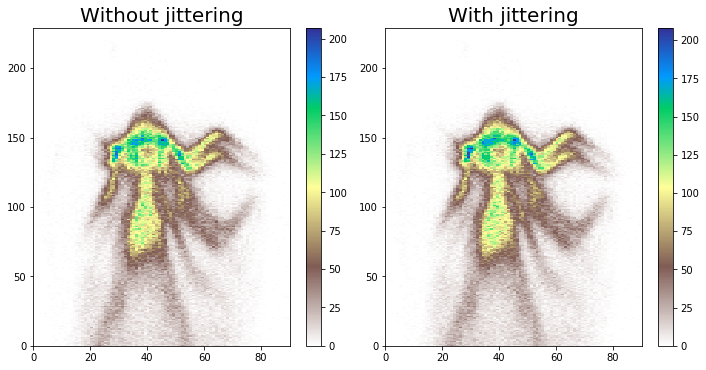

In [5]:
f, axs = plt.subplots(1, 2, figsize=(10,5))
vis.colormesh2d((binned_nj[50,::-1,::-1]).T, colormap='terrain_r',\
           vmin=0, cbar=True, plotaxes=axs[0])
vis.colormesh2d(binned_jt[50,::-1,::-1].T, colormap='terrain_r',\
           vmin=0, cbar=True, plotaxes=axs[1])
axs[0].set_title('Without jittering', fontsize=20)
axs[1].set_title('With jittering', fontsize=20);
#plt.savefig('Jittering_2D.png', bbox_inches='tight', dpi=300)

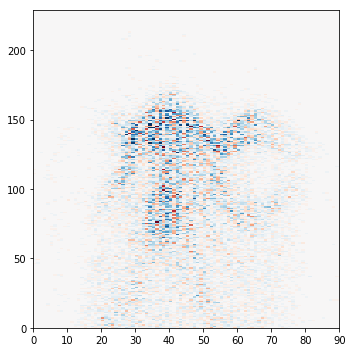

In [7]:
fd, axd = plt.subplots(1, 1, figsize=(5,5))
vis.colormesh2d(binned_nj[50,::-1,::-1].T - binned_jt[50,::-1,::-1].T, colormap='RdBu_r', \
                cscale={'vmin':-20, 'vmax':20}, plotaxes=axd);
# plt.savefig('Jittering_2D_diff.png', bbox_inches='tight', dpi=300)

#### (2) Angle-integrated energy dispersion curve (EDC)

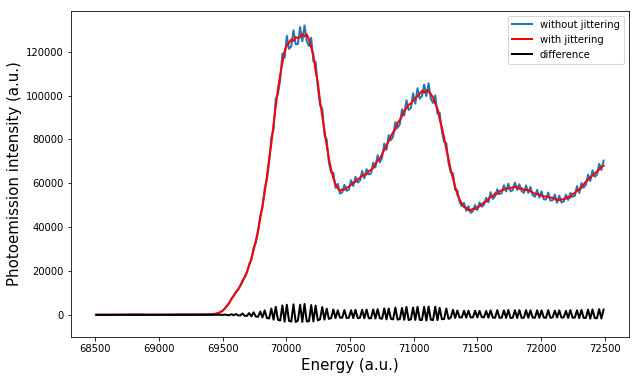

In [9]:
nj_1d_EDC = binned_nj.sum(axis=(0,1))
jt_1d_EDC = binned_jt.sum(axis=(0,1))
fedc, axedc = plt.subplots(figsize=(10,6))
plt.plot(binned_nojitter['t'], nj_1d_EDC, lw=2, label='without jittering')
plt.plot(binned_jitter['t'], jt_1d_EDC, 'r', lw=2, label='with jittering')
plt.plot(binned_jitter['t'], nj_1d_EDC - jt_1d_EDC, 'k', lw=2, label='difference')
axedc.set_xlabel('Energy (a.u.)', fontsize=15)
axedc.set_ylabel('Photoemission intensity (a.u.)', fontsize=15)
plt.legend();
#plt.savefig('Jittering_1D.png', bbox_inches='tight', dpi=300)

#### (3) Energy-integrated momentum dispersion curve (MDC)

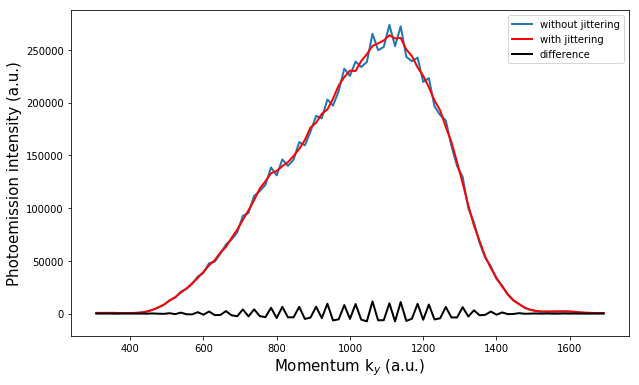

In [10]:
nj_1d_MDC = binned_nj[:,:,100:].sum(axis=(0,2))
jt_1d_MDC = binned_jt[:,:,100:].sum(axis=(0,2))
fmdc, axmdc = plt.subplots(figsize=(10,6))
plt.plot(binned_nojitter['Y'], nj_1d_MDC, lw=2, \
         label='without jittering')
plt.plot(binned_jitter['Y'], jt_1d_MDC, 'r', lw=2, \
         label='with jittering')
plt.plot(binned_jitter['Y'], nj_1d_MDC - jt_1d_MDC, 'k', lw=2, label='difference')
axmdc.set_xlabel('Momentum k$_y$ (a.u.)', fontsize=15)
axmdc.set_ylabel('Photoemission intensity (a.u.)', fontsize=15)
plt.legend();

Combine the plots

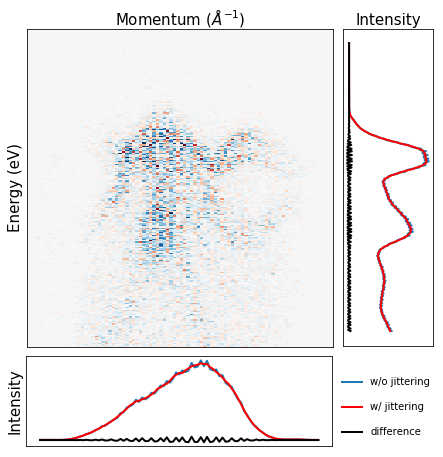

In [78]:
# rect [left, bottom, width, height]
f, ax = plt.subplots(figsize=(5, 5))
vis.colormesh2d(binned_nj[50,::-1,::-1].T - binned_jt[50,::-1,::-1].T, colormap='RdBu_r', \
                cscale={'vmin':-20, 'vmax':20}, plotaxes=ax);
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_label_position("top")
ax.set_xlabel('Momentum ($\AA^{-1}$)', fontsize=15)
ax.set_ylabel('Energy (eV)', fontsize=15)

ax_edc = f.add_axes([0.98, 0.08, 0.25, 0.88])
ax_edc.plot(nj_1d_EDC[::-1], binned_nojitter['t'], lw=2, label='without jittering')
ax_edc.plot(jt_1d_EDC[::-1], binned_jitter['t'], 'r', lw=2, label='with jittering')
ax_edc.plot(nj_1d_EDC[::-1] - jt_1d_EDC[::-1], binned_jitter['t'], 'k', lw=2, label='difference')
ax_edc.set_xticks([])
ax_edc.set_yticks([])
ax_edc.set_xlabel('Intensity', fontsize=15)
ax_edc.xaxis.set_label_position("top")

ax_mdc = f.add_axes([0.1, -0.2, 0.85, 0.25])
ax_mdc.plot(binned_nojitter['Y'], nj_1d_MDC, lw=2, \
         label='w/o jittering')
ax_mdc.plot(binned_jitter['Y'], jt_1d_MDC, 'r', lw=2, \
         label='w/ jittering')
ax_mdc.plot(binned_jitter['Y'], nj_1d_MDC - jt_1d_MDC, 'k', lw=2, label='difference')
ax_mdc.set_xticks([])
ax_mdc.set_yticks([])
ax_mdc.set_ylabel('Intensity', fontsize=15)

# ax_lg = f.add_axes([0.98, -0.2, 0.25, 0.25])
ax_mdc.legend(loc='lower right', bbox_to_anchor=[1.1, 0, 0.25, 0.25], frameon=False, labelspacing=1.5)
# ax_lg.set_xticks([])
# ax_lg.set_yticks([])
# plt.savefig('./Tutfiles/Jittered_Panel.png', dpi=300, bbox_inches='tight')

### Parallel version

In [8]:
import glob as g
from time import time

In [9]:
hfiles = g.glob(r'../data/data_114_parts/*.h5')
_, hfsorted = fp.sortNamesBy(hfiles, r'\d+', slicerange=(-10, None))

In [10]:
parp = fp.parallelHDF5Processor(hfsorted[:5])

In [11]:
tstart = time()
parp.parallelBinning(axes=axes, nbins=bins, ranges=ranges, scheduler='threads', \
                     binning_kwds={'jittered':True, 'jitter_amplitude':[2e-1]*3}, ret=False)
tend = time()
print('Binning took about {} s.'.format(int(tend - tstart)))

Binning took about 14 s.


In [16]:
result = parp.combineResults()

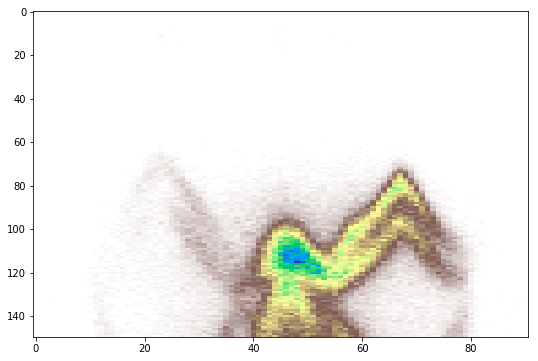

In [17]:
plt.figure(figsize=(10,6))
plt.imshow(result['binned'][50,...].T, cmap='terrain_r', aspect=0.4)

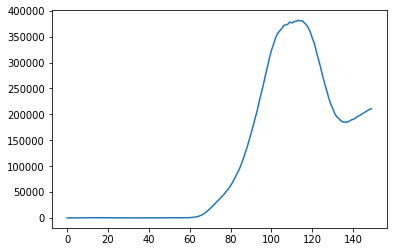

In [18]:
plt.plot(result['binned'].sum(axis=(0,1)))

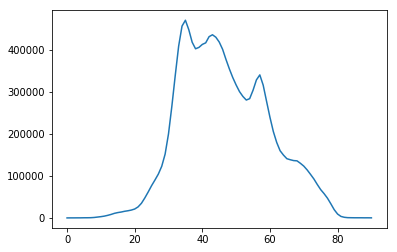

In [19]:
plt.plot(result['binned'][:,:,100:].sum(axis=(0,2)))